In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import manifold
from sklearn.metrics import euclidean_distances
import nltk
from collections import Counter
import sys
import gensim, logging
import scipy
import scipy.cluster.hierarchy as hcluster
import matplotlib.pyplot as plt

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors

In [5]:
import zipfile
import wget

model_url = 'http://vectors.nlpl.eu/repository/20/180.zip'
m = wget.download(model_url)
model_file = model_url.split('/')[-1]
with zipfile.ZipFile(model_file, 'r') as archive:
    stream = archive.open('model.bin')
    model = gensim.models.KeyedVectors.load_word2vec_format(stream, binary=True)

 99% [..................................................................... ] 484376576 / 484452317

2022-05-11 20:14:13,192 : INFO : loading projection weights from <zipfile.ZipExtFile name='model.bin' mode='r' compress_type=deflate>


100% [......................................................................] 484452317 / 484452317

2022-05-11 20:14:23,934 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (189193, 300) matrix of type float32 from <zipfile.ZipExtFile [closed]>', 'binary': True, 'encoding': 'utf8', 'datetime': '2022-05-11T20:14:23.934672', 'gensim': '4.1.2', 'python': '3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'load_word2vec_format'}


In [6]:
nltk.download('wordnet')
nltk.download('omw')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yutam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\yutam\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


In [7]:
run_exemplar = wn.synset('run.v.01')
lemmas_dict = {}
for l in wn.langs():
    lemmas_dict[l] = run_exemplar.lemma_names(l)

Сначала я брала совсем все синсеты, но их там больше 1000, так что я убрала редкие (меньше 5 раз, как в прошлой домашке), чтобы по графику можно было хоть что-то понять

In [8]:
def get_nodes(obj, amount): #amount - то, сколько раз встречается синсет. По заданию это 5, но я оставила возможность регулировать, чтобы посмотреть на варианты графика
    s = []                 
    syns = []
    for w in obj:
        for wor in obj[w]:
            s.extend(wn.synsets(wor, lang=w))
          #  syns.extend(wn.synsets(wor, lang=w))
    finals = []
    c = Counter(s)
    for e in c:
        if int(c[e]) > amount:
            syns.append(e)
            finals.append(e)  
    return syns, finals

In [9]:
synsets, finals = get_nodes(lemmas_dict, 5)
unique_syns = set(synsets)

In [10]:
my_second_dict = {}
un = list(unique_syns)
for w in lemmas_dict:
    for wor in lemmas_dict[w]:
        matr = []
        for synset in un:
            if synset in wn.synsets(wor, lang = w):
                matr.append(1)
            else:
                matr.append(0)
        my_second_dict[wor] = matr
        

my_second_dict['synset'] = un
df2 = pd.DataFrame(my_second_dict)
df2.set_index('synset')

,run,ecje_e_shpejtë,إجتاز_بسرعة,أدار,أذاب,انتشر,انزلق,أنسل,أيد_ترشيح,بدأ_العدو,...,draven,rennen,springe,løpe,correr,bežati,biti,teči,springa,วิ่ง
synset,,,,,,,,,,,,,,,,,,,,,
Synset('run.v.27'),1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Synset('diffuse.v.01'),0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Synset('run.v.26'),1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Synset('run.v.29'),1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,0,1
Synset('run.v.30'),1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Synset('prevail.v.03'),1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Synset('run.v.33'),1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Synset('run.v.11'),1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Synset('tend.v.01'),1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [24]:
matrix = df2.loc[:, 'run':'วิ่ง']
array = matrix.values
print (array.shape)

(37, 90)


In [12]:
similarities = euclidean_distances(array)
mds = manifold.MDS(n_components=2)
print (mds.fit(similarities).stress_) # функция потерь: показывает, насколько сильно расстояния в новом пространстве отличаются от расстояний в исходном пространстве  

C:\Users\yutam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_mds.py:517: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


686.8449490811946


In [13]:
array_mds = mds.fit_transform(array)
print (array_mds)

[[ 1.47521151 -0.92283202]
 [-1.25919833  0.67057279]
 [-1.39840625 -3.08850474]
 [-2.05407266 -4.05471278]
 [ 0.82298872 -0.01102146]
 [ 0.72516645  0.57937993]
 [ 1.07367411 -3.24002549]
 [-0.22377615 -2.15916624]
 [ 1.43538381 -0.27108484]
 [ 1.43538381 -0.27108484]
 [ 0.55143532 -3.01518051]
 [-2.24875329  0.35943066]
 [ 1.43538381 -0.27108484]
 [ 0.82298872 -0.01102146]
 [ 0.82298872 -0.01102146]
 [-2.51735736 -0.62349815]
 [ 2.10363338  0.41616915]
 [ 1.43538381 -0.27108484]
 [ 0.29399521  0.13772492]
 [ 0.82298872 -0.01102146]
 [ 0.82298872 -0.01102146]
 [ 1.43538381 -0.27108484]
 [ 1.64728052 -0.81215447]
 [ 2.23027329 -0.51711279]
 [ 2.11567016  1.00875333]
 [-2.97037199  4.90649777]
 [ 1.3097689   1.73832303]
 [ 1.19286607 -0.91083689]
 [-0.32907185 -1.17623828]
 [ 0.36005559  1.60619406]
 [-2.04011946  5.21719409]
 [ 0.82298872 -0.01102146]
 [ 1.43538381 -0.27108484]
 [-1.38233487  5.61994293]
 [-2.79039385 -1.62643074]
 [-1.6412528  -1.25094326]
 [-7.77415686  2.83009148]]


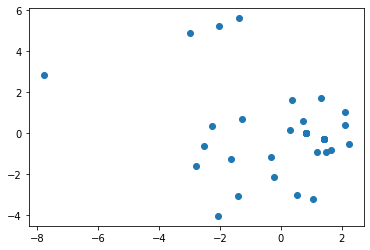

In [14]:
plt.scatter(array_mds[:, 0], array_mds[:, 1])
plt.show()

In [15]:
x = []
y = []
for pair in array_mds:
    x.append(pair[0])
    y.append(pair[1])
phrases = df2['synset'].values

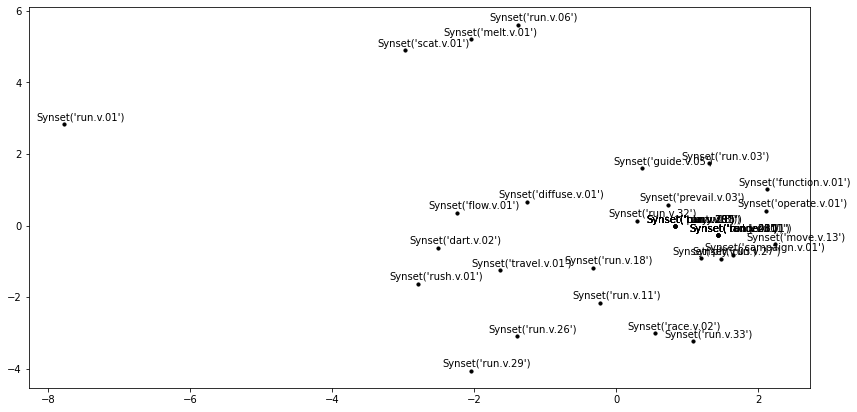

In [16]:
plt.figure(figsize=(14, 7))
for i in range(len(x)):
    plt.scatter(x[i], y[i], c = 'black', s=10)
    plt.annotate(str(phrases[i]), (x[i]-0.4, y[i]+0.1))
plt.show()

## Шаг 3

На графике четко выделяется группа: run.v.06 ( "Water flowed into the cave"; "the Missouri feeds into the Mississippi"), scat.v.01 (flee; take to one's heels; cut and run) "If you see this man, run!"; "The burglars escaped before the police showed up"), melt.v.01 (reduce or cause to be reduced from a solid to a liquid state, usually by heating) "melt butter"; "melt down gold"; "The wax melted in the sun"). Как будто они имеют похожую семантику, связанны с жидкостью или течением (scat не так очевидно, но вроде для него синоним flee). 

Интересно, что синсет run.v.01 стоит особняком от остальных - скорее всего, это из-за того, что это самое буквальное значение, которое есть у всех слов в списке. На самом деле, это странно, что 

Еще относительно отдельно стоит run.v.29 (S: (v) run (cover by running; run a certain distance) "She ran 10 miles that day"), видимо это какое-то редкое значение (может, его просто не все выделяют в отдельный синсет?)

Остальные стоят более-менее вместе.

## Шаг 4

Подставляем русские аналоги к словам (пока я составляла, обратила внимание на то, что в английском часто обозначается словом run, мы чаще обозначаем словом идти:

 Synset('flow.v.01') = течь (flow, flux (move or progress freely as if in a stream) "The crowd flowed out of the stadium")
 
 Synset('move.v.13') = пройтись (move, go, run (progress by being changed) "The speech has to go through several more drafts"; "run through your presentation before the meeting")
 
 Synset('play.v.18') = проигрывать (play, run (cause to emit recorded audio or video) "They ran the tapes over and over again"; "I'll play you my favorite record"; "He never tires of playing that video")
 
 Synset('melt.v.01') = таять (melt, run, melt down (reduce or cause to be reduced from a solid to a liquid state, usually by heating) "melt butter"; "melt down gold"; "The wax melted in the sun")
 
 Synset('hunt.v.01') = охотиться (hunt, run, hunt down, track down (pursue for food or sport (as of wild animals)) "Goering often hunted wild boars in Poland"; "The dogs are running deer"; "The Duke hunted in these woods")
 
 Synset('run.v.18') = передаваться (run (occur persistently) "Musical talent runs in the family")
 
 Synset('dart.v.02') = броситься (dart, dash, scoot, scud, flash, shoot (run or move very quickly or hastily) "She dashed into the yard")
 
 Synset('run.v.33') = бежать (run (run with the ball; in such sports as football))
 
 Synset('rush.v.01') = мчаться (rush, hotfoot, hasten, hie, speed, race, pelt along, rush along, cannonball along, bucket along, belt along, step on it (move hurridly) "He rushed down the hall to receive his guests"; "The cars raced down the street")
 
 Synset('function.v.01') = работать (function, work, operate, go, run (perform as expected when applied) "The washing machine won't go unless it's plugged in"; "Does this old car still run well?"; "This old radio doesn't work anymore")
 
 Synset('run.v.32') = идти (run, consort (keep company) "the heifers run with the bulls to produce offspring")
 
 Synset('run.v.11') = бегать (run (move about freely and without restraint, or act as if running around in an uncontrolled way) "who are these people running around in the building?"; "She runs around telling everyone of her troubles"; "let the dogs run free")
 
 Synset('diffuse.v.01') = разбегаться (diffuse, spread, spread out, fan out (move outward) "The soldiers fanned out")
 
 Synset('operate.v.01') = проводить (operate, run (direct or control; projects, businesses, etc.) "She is running a relief operation in the Sudan")
 
 Synset('run.v.23') = проводить (run, lead (cause something to pass or lead somewhere) "Run the wire behind the cabinet")
 
 Synset('run.v.30') = идти (run for (extend or continue for a certain period of time) "The film runs 5 hours")
 
 Synset('run.v.26') = погонять (run (cause an animal to move fast) "run the dogs")
 
 Synset('ladder.v.01') = распуститься (ladder, run (come unraveled or undone as if by snagging) "Her nylons were running")
 
 Synset('run.v.25') = продаваться (black market (deal in illegally, such as arms or liquor))
 
 Synset('run.v.03') = распространяться (run, go, pass, lead, extend (stretch out over a distance, space, time, or scope; run or extend between two points or beyond a certain point) "Service runs all the way to Cranbury"; "His knowledge doesn't go very far"; "My memory extends back to my fourth year of life"; "The facts extend beyond a consideration of her personal assets")
 
 Synset('run.v.05') = идти (run, go (have a particular form) "the story or argument runs as follows"; "as the saying goes...")
 
 Synset('guide.v.05') = пробежаться (guide, run, draw, pass (pass over, across, or through) "He ran his eyes over her body"; "She ran her fingers along the carved figurine"; "He drew her hair through his fingers")
 
 Synset('run.v.29') = пробежать (cover by running; run a certain distance) "She ran 10 miles that day")
 
 Synset('campaign.v.01') = подаваться (campaign, run (run, stand, or compete for an office or a position) "Who's running for treasurer this year?")
 
 Synset('travel.v.01') = путешествовать (travel, go, move, locomote (change location; move, travel, or proceed, also metaphorically) "How fast does your new car go?"; "We travelled from Rome to Naples by bus"; "The policemen went from door to door looking for the suspect"; "The soldiers moved towards the city in an attempt to take it before night fell"; "news travelled fast")
 
 Synset('run.v.19') = запускать (run, execute (carry out a process or program, as on a computer or a machine) "Run the dishwasher"; "run a new program on the Mac"; "the computer executed the instruction")
 
 Synset('tend.v.01') = склоняться (tend, be given, lean, incline, run (have a tendency or disposition to do or be something; be inclined) "She tends to be nervous before her lectures"; "These dresses run small"; "He inclined to corpulence")
 
 Synset('run.v.27') = вытекать (bleed (be diffused) "These dyes and colors are guaranteed not to run")
 
 Synset('ply.v.03') = курсировать (ply, run (travel a route regularly) "Ships ply the waters near the coast")
 
 Synset('range.v.01') = варьироваться (range, run (change or be different within limits) "Estimates for the losses in the earthquake range as high as $2 billion"; "Interest rates run from 5 to 10 percent"; "The instruments ranged from tuba to cymbals"; "My students range from very bright to dull")
 
 Synset('race.v.02') = бежать (race, run (compete in a race) "he is running the Marathon this year"; "let's race and see who gets there first")
 
 Synset('prevail.v.03') = преобладать (prevail, persist, die hard, run, endure (continue to exist) "These stories die hard"; "The legend of Elvis endures")
 
 Synset('run.v.06') = течь (run, flow, feed, course (move along, of liquids) "Water flowed into the cave"; "the Missouri feeds into the Mississippi")
 
 Synset('run.v.41') = распуститься (run, unravel (become undone) "the sweater unraveled")
 
 Synset('scat.v.01') = смыться (scat, run, scarper, turn tail, lam, run away, hightail it, bunk, head for the hills, take to the woods, escape, fly the coop, break away (flee; take to one's heels; cut and run) "If you see this man, run!"; "The burglars escaped before the police showed up")
 
 Synset('run.v.01') = бежать (run (move fast by using one's feet, with one foot off the ground at any given time) "Don't run--you'll be out of breath"; "The children ran to the store")
 
 Synset('carry.v.15') = проводить (carry, run (include as the content; broadcast or publicize) "We ran the ad three times"; "This paper carries a restaurant review"; "All major networks carried the press conference")

In [19]:
model.save("word2vec.model") 

2022-05-11 20:59:50,416 : INFO : KeyedVectors lifecycle event {'fname_or_handle': 'word2vec.model', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-05-11T20:59:50.415766', 'gensim': '4.1.2', 'python': '3.10.0 (tags/v3.10.0:b494f59, Oct  4 2021, 19:00:18) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'saving'}
2022-05-11 20:59:50,429 : INFO : storing np array 'vectors' to word2vec.model.vectors.npy
2022-05-11 20:59:52,537 : INFO : saved word2vec.model


In [18]:
russian_dict = {'flow.v.01': 'течь', 'move.v.13': 'пройтись', 'play.v.18': 'проигрывать', 'melt.v.01': 'таять',
               'hunt.v.01': 'охотиться', 'run.v.18': 'передаваться', 'dart.v.02': 'броситься', 'run.v.33': 'бежать',
                'rush.v.01': 'мчаться', 'function.v.01': 'работать', 'run.v.32': 'вести', 'run.v.11': 'бегать',
                'diffuse.v.01': 'разбегаться', 'operate.v.01': 'проводить', 'run.v.23': 'провести', 'run.v.30': 'идти',
               'run.v.26': 'погонять', 'ladder.v.01': 'распуститься', 'run.v.25': 'продаваться', 'run.v.03': 'распространяться',
               'run.v.05': 'следовать', 'guide.v.05': 'пробежаться', 'run.v.29': 'пробежать', 'campaign.v.01': 'провести',
                'travel.v.01': 'путешествовать', 'run.v.19': 'запускать', 'tend.v.01': 'склоняться', 'run.v.27': 'вытекать',
               'ply.v.03': 'курсировать', 'range.v.01': 'варьироваться', 'race.v.02': 'гнаться', 'prevail.v.03': 'преобладать',
               'run.v.06': 'течь', 'run.v.41': 'распуститься', 'scat.v.01': 'смыться', 'run.v.01': 'бежать', 'carry.v.15': 
               'проводить'}

In [33]:
new_russ = {}
for key, value in russian_dict.items():
    verb = str(value) + '_VERB'
    vector_verb = list(np.array(model[verb]))
    new_russ[key] = vector_verb

In [36]:
vectors_list = list(new_russ.values())
similarities = euclidean_distances(vectors_list)
mds = manifold.MDS(n_components=2)
array_mds_new = mds.fit_transform(vectors_list)

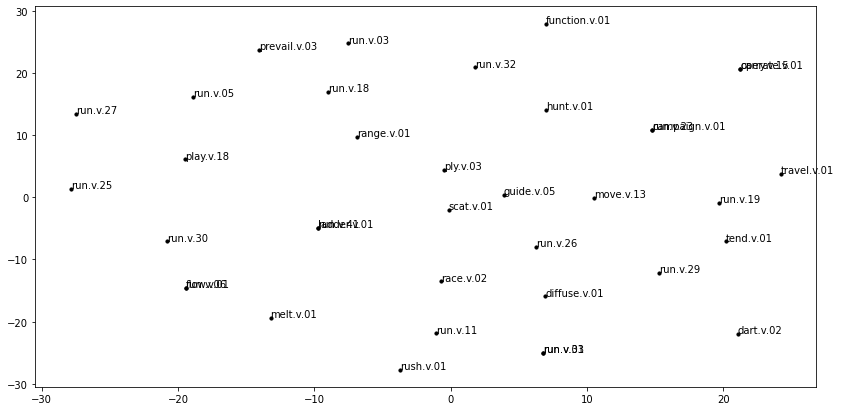

In [43]:
plt.figure(figsize=(14, 7))
for n, a in enumerate(array_mds_new):
    synt = list(new_russ.keys())[n]
    coord = a
    plt.scatter(coord[0], coord[1], c = 'black', s=10)
    plt.annotate(str(synt), (coord[0], coord[1]+0.1))
plt.show()

Честно говоря, очень странные результаты, не уверена, что по ним можно что-то сказать... Друг на друга наступают синсеты, которые могут переводиться одним словом. 